In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 

In [76]:
# Define the path to a new image for prediction
filepath = r'C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Malignant cases\Malignant case (13).jpg'

In [77]:
img = cv2.imread(filepath,0)

In [78]:
with np.printoptions(threshold=np.inf): # full array
    print(img.shape)
    print(img)

(512, 512)
[[ 38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  42  42  42  42  42  43  43
   42  42  42  43  43  43  42  42  42  43  44  42  43  43  41  43  44  43
   42  42  41  42  41  42  43  44  43  43  43  42  41  42  44  46  43  41
   42  43  42  41  43  43  41  42  41  42  43  43  43  42  43  41  42  43
   41  42  44  44  45  42  43  42  42  43  43  44  44  42  41  42  42  41
   43  43  43  42  43  43  42  43  42  42  42  42  43  43  43  43  42  41
   44  44  43  41  41  41  42  44  42  42  42  43  41  40  42  44  41  43
   43  42  41  42  41  42  42  41  41  40  41  41  43  43  42  42  41  41
   42  43  43  43  43  43  42  41  42  42  41  40  41  44  43  41  41  41
   44  42  40  42  43  44  44  43  42  43  42  41  41  43  43  42  41  41
   41  43  42  42  43  44  43  42  42  42  43  42  42  44  43  42  42  43
   45  43  41  42  42  41  

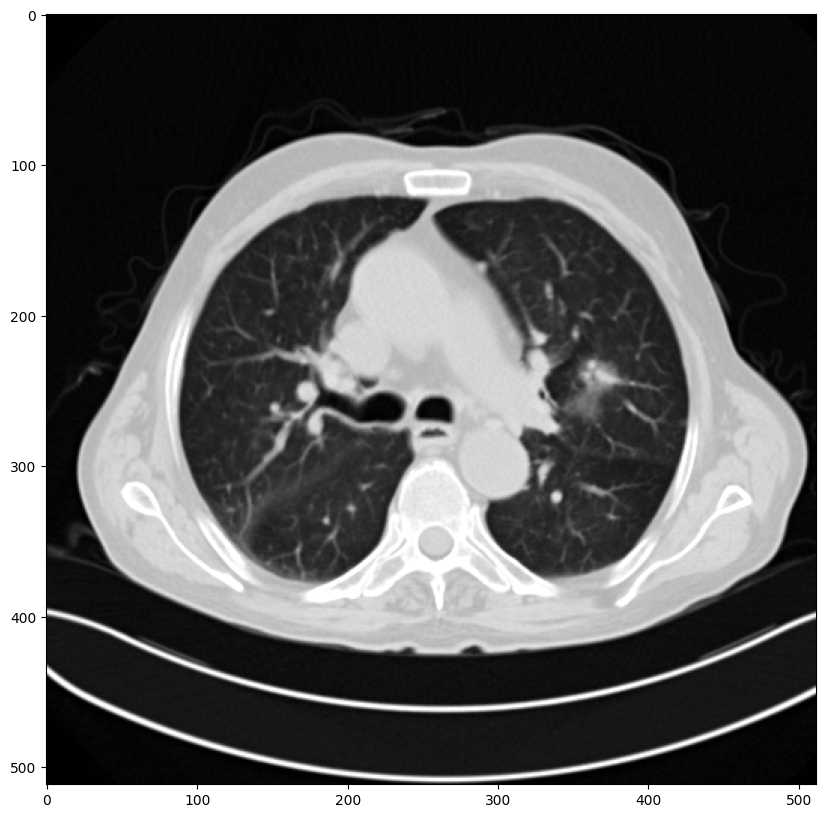

In [79]:
plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')               # show the image
plt.show()

In [65]:
img_size = 256
img = cv2.resize(img, (img_size, img_size))

In [66]:
X = np.array(img).reshape(-1, img_size, img_size, 1)

In [67]:
X.shape

(1, 256, 256, 1)

In [68]:
X = X / 255.0

In [69]:
# Load the trained model
loaded_model = tf.keras.models.load_model('ct_scan_model1.h5')

In [70]:
# Make a prediction
prediction = loaded_model.predict(X)

1/1 [==============================] - 0s 100ms/step


In [71]:
prediction

array([[3.2046046e-08, 1.0000000e+00, 1.9111933e-08]], dtype=float32)

In [72]:
np.argmax(prediction)

1

In [74]:
# Decode the prediction
class_labels = {'Benign':0,
                "Malignant":1,
                'Normal':2}
predicted_class = list(class_labels.keys())[np.argmax(prediction)]

print(f'Predicted Class: {predicted_class}')

Predicted Class: Malignant
